# EE 511 Project 1 Report

This is an all-in-one report to EE 511 Project 1, where the explanations, discussions and codes are included.

All experiments are run in Python code.

## Core Concepts
* Rejection Method

Rejection Method is a useful method to generate samples from a distribution we need, denoted its density function as $f\left( x \right)$, which is hard to obtain observations by another easy-to-generate distribution, denoted its density function as $g\left( x \right)$. We use formula $U\le \frac{f\left( x \right)}{cg\left( x \right)}$ to accept the observation if it is true. $U$ is a random value generated from uniform(0,1), and $x$ is generated from $g\left( x \right)$. $\left| \frac{f(x)}{g\left( x \right)} \right|$ should be bounded within $c>1$ and it is better for $c$ to be close to $1$.

* Bernoulli Trials

A Bernoulli trial is a random experiment with exactly two possible outcomes, "success" and "failure", in which the probability of success is the same every time the experiment is conducted. (From Wikipedia https://en.wikipedia.org/wiki/Bernoulli_trial)

* Binomial Distribution

Binomial Distribution, denoted as $B\left( n,p \right)$, is a discrete probability distribution with parameters $n$ and $p$ in a sequence of $n$ Bernoulli trial, each asking a yes–no question, and each with its own boolean-valued outcome: a random variable containing single bit of information: success/yes/true/one (with probability $p$) or failure/no/false/zero (with probability $q=1-p$). (From Wikipedia https://en.wikipedia.org/wiki/Binomial_distribution)

## Exp.1 [A few Coin]
--------------------------------------------

First we import the libs we need in this project.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.special import comb
rcParams['font.family'] = 'Latin Modern Math'
rcParams['font.sans-serif'] = ['Latin Modern Math','Latin Modern Math','Latin Modern Math','Latin Modern Math']
pi = np.pi
%matplotlib inline

Function `RejMethod` is the most important function we use in this project. It receives two functions, for $f$ and $g$, and their bound, and the number of conductions. It returns a numpy array containing the results of acceptions. Its element is 1 for acception and 0 for rejection. By properly selecting $f$ and $g$ input, we can conduct Acception-Rejection sampling on any distribution we expect.

In [2]:
def RejMethod(f,g,M,cts):
    '''
    |f/g| is bounded with M, and we expect c to be close to 1 and >1.
    f is the density function from which we want to generate rvs.
    Besides, density p is hard to generate.
    g is the density function whose samples are easy to generate. e.g Uniform Distribution's
    g must support f, that is g(x)>0 whenever f(x)>0
    
    Generate a Xcard from g, generate a U from Uniform(0,1)
    if U <= f(Xcard) / (M * g(Xcard)),then accept Xcard, otherwise repeat it.
    
    cts is the # of reservations.
    '''
    
    result = np.zeros([cts])
    for i in range(cts):
        Xcard = g() # when g receives no argument, it returns a random number from itself.
        U = np.random.rand(1)
        result[i] = int(U <= f(Xcard) / (M * g(Xcard)))
    return result

We define 0-1 uniform distribution function `Uniform01`. Its argument is optional. When an argument is given, it returns its corresponding value of the density function (Of course return 1 in this case). Otherwise, it uniformly return a value falling into [0,1).

In [3]:
def Uniform01(x = 2):
    '''
    This is the g function we will use later
    '''
    if x < 0 or x > 1:
        return np.random.rand(1)
    else:
        return 1

Function `Toss` conducts tossing a coin for one time. Note that this is a discrete random variable with $p\left( ''head'' \right)=p\left( ''tail'' \right)=0.5$, `Toss(x)` returns the probability of $p\left( ''head'' \right)$. We do not care the input of `Toss`. Its input is for being called by function `RejMethod`.

In [4]:
def Toss(x):
    return 0.5

### 1. The distribution of 100 times of fair Bernoulli trials

Let $X$ be the number of success in the sequence of Bernoulli trials, then $X\tilde{\ }B\left( 100,0.5 \right)$, where $n=100,p=0.5$. Its expection is $np=50$. Which implies that both the numbers of "head" and "tail" should be approximate to 50 after finishing the experiment.

We can see the following figure exactly showed this conclusion.

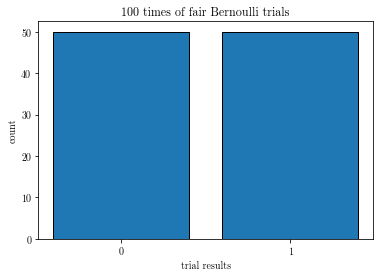

In [154]:
result = RejMethod(Toss,Uniform01,1,100)

#plt.figure(figsize = (1.5,0.5),dpi = 108)
plt.hist(result, bins =  [0,1,2], rwidth = 0.8, edgecolor = 'black') 
plt.ylabel('count')
plt.xlabel('trial results')
plt.title('100 times of fair Bernoulli trials')
_ = plt.xticks([0.5,1.5],['0','1'])

### 2. 100 times of the number of successes in 7 times of fair Bernoulli trials

Let $X$ be the number of successes in 7 times of fair Bernoulli trials. Then $X\tilde{\ }B\left( 7,0.5 \right)$. Its probability mass function is accordingly:

$$P\left( X=k \right)=\left( \begin{matrix}
   n  \\
   k  \\
\end{matrix} \right){{p}^{k}}{{\left( 1-q \right)}^{n-k}}$$

We plot its distribution table on the following table, and compare it with the results of experiments. The results of experiments are frequencies. We can see that their shapes are similar.

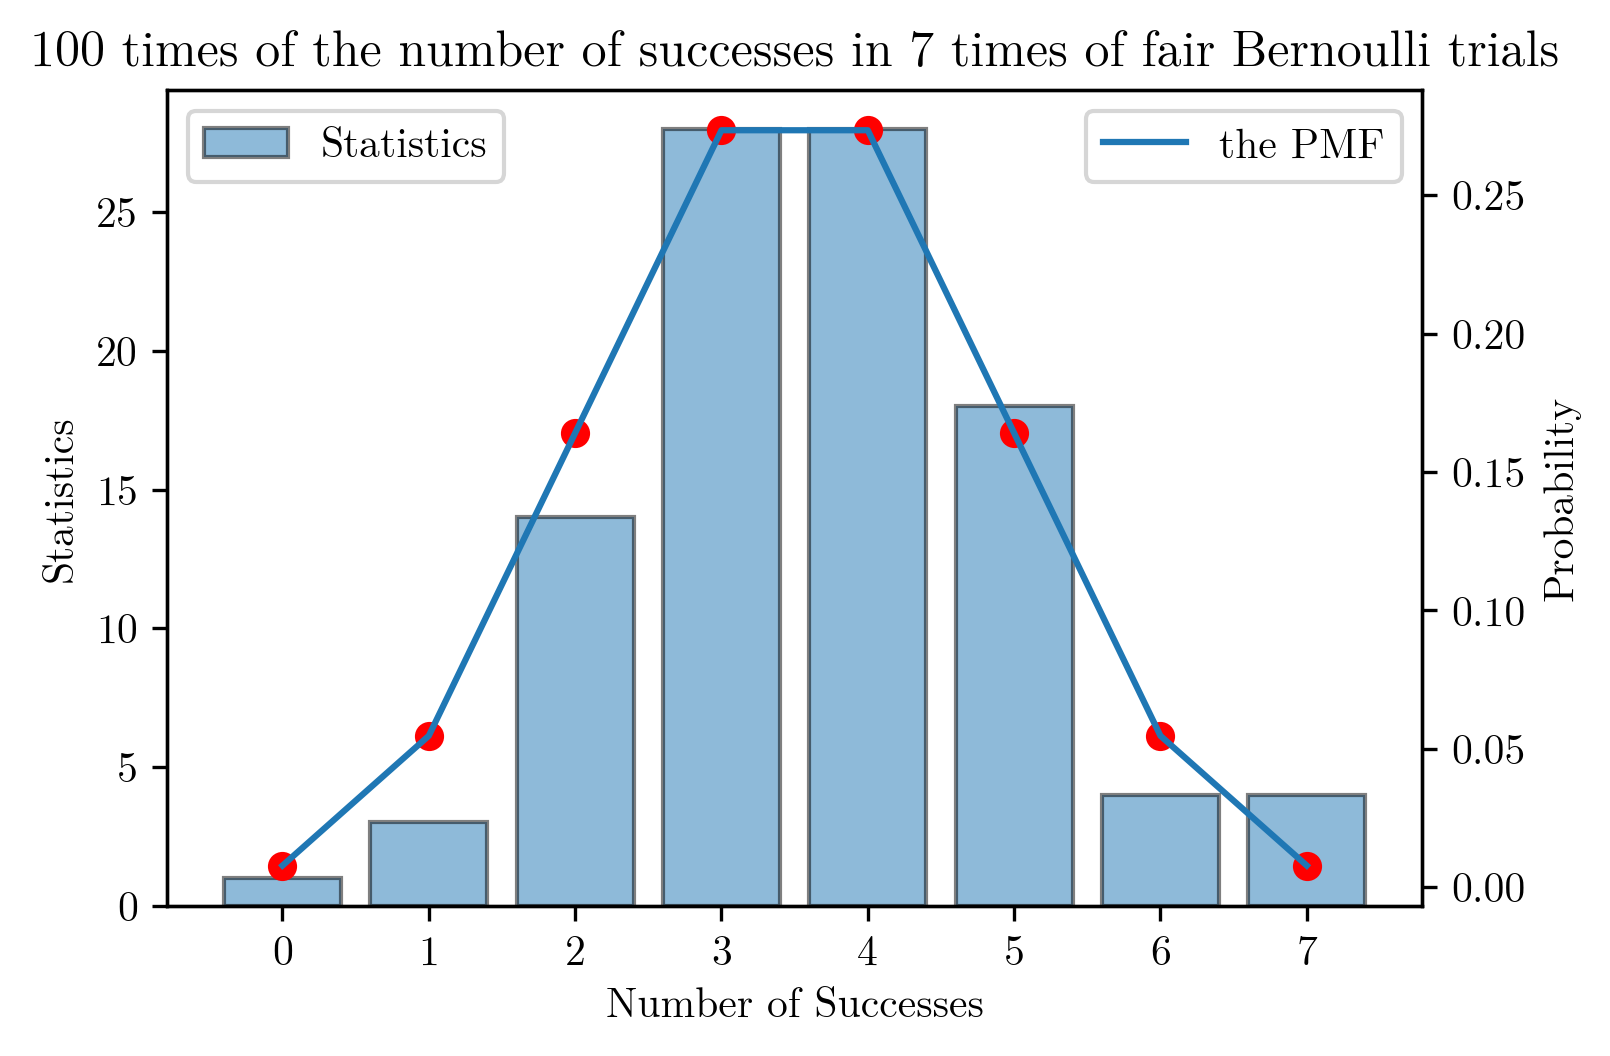

In [48]:
#100 times of the number of successes in 7 times of fair Bernoulli trials
result = np.zeros([100,1])

p = np.zeros([8])
for k in range(8):
    p[k] = comb(7,k) * 0.5 ** 7

for i in range(100):
    result[i] = np.sum(RejMethod(Toss,Uniform01,1,7))


plt.figure(figsize = (5.4,3.6),dpi = 300)
plt.hist(result, bins = range(9), rwidth = 0.8, alpha = 0.5, \
         edgecolor = 'black', label = 'Statistics') 
plt.ylabel('Statistics')
plt.xlabel('Number of Successes')
plt.legend(loc='upper left')
plt.title('100 times of the number of successes in 7 times of fair Bernoulli trials')
_ = plt.xticks(np.array([0,1,2,3,4,5,6,7])+0.5,[str(i) for i in [0,1,2,3,4,5,6,7]])
ax2 = plt.twinx()
ax2.plot(np.arange(0,8,1)+0.5,p,label = 'the PMF')
ax2.scatter(np.arange(0,8,1)+0.5, p, marker = 'o', color = '#FF0000')
ax2.set_ylabel('Probability')
ax2.legend(loc='upper right')


### 3. 100 times of the number of longest run of heads

Let $X$ be the number of longest run of heads. Then it depends on Geometric Distribution. The probability mass function of $X$ is accordingly given by:
$$P\left( X=k \right)={{p}^{k}}\left( 1-p \right)$$
where $k=0,1,2,...$, $p$ is the probability of head appearing.
The PMF drops dramatically as $k$ grows up, so we only show small-k-part the of the shape of PMF.

Plot the PMF, and compare it with the result of experiments. We can see that they are similar

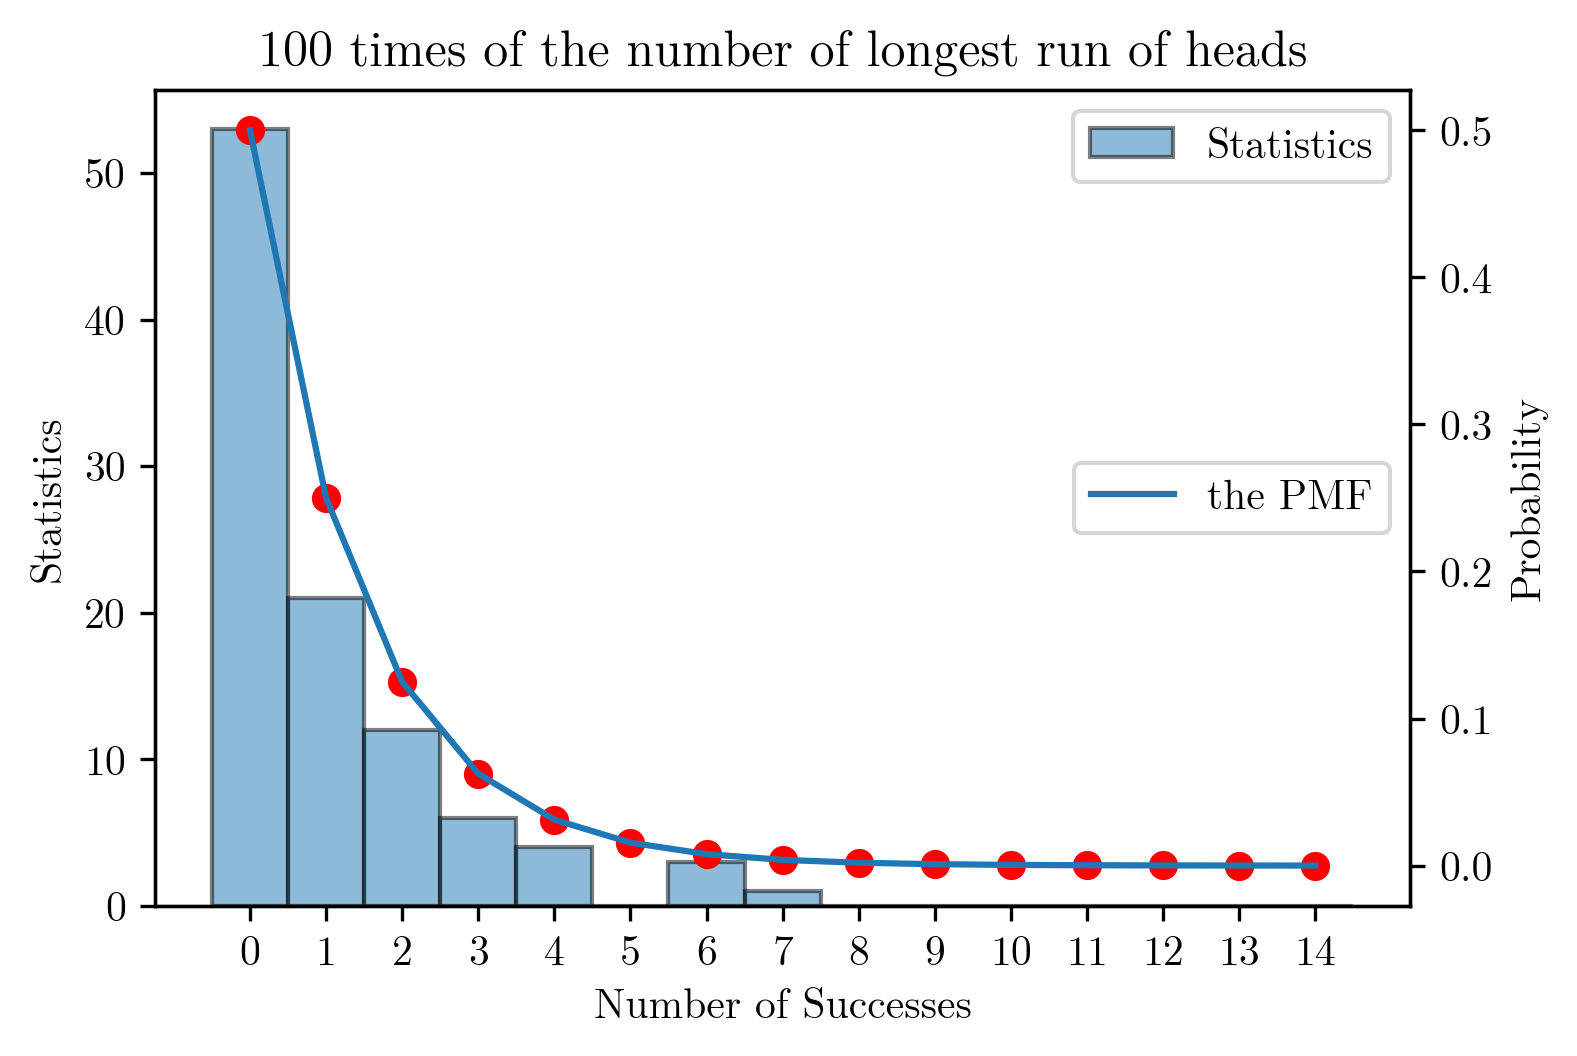

In [32]:
result = np.zeros([100,1])

for i in range(100):
    for j in range(15):
        if RejMethod(Toss,Uniform01,1,1):
            result[i] += 1
        else:
            break

p = np.zeros([15])
for k in range(15):
    p[k] = 0.5**k * (1-0.5)

plt.figure(figsize = (5.4,3.6),dpi = 300)
plt.hist(result, bins = np.arange(0,16,1), edgecolor = 'black'\
         , alpha = 0.5, label = 'Statistics') 
plt.ylabel('Statistics')
plt.xlabel('Number of Successes')
plt.legend(loc='upper right')
plt.title('100 times of the number of longest run of heads')
_ = plt.xticks(np.arange(0,15,1)+0.5,[str(i) for i in np.arange(0,15,1)])

ax2 = plt.twinx()
ax2.plot(np.arange(0,15,1)+0.5,p,label = 'the PMF')
ax2.scatter(np.arange(0,15,1)+0.5, p, marker = 'o', color = '#FF0000')
ax2.set_ylabel('Probability')
ax2.legend(loc='center right')

## Exp.2 [Counting Successes]
--------------------------------------------

### k = 5
When k = 5, the binomial random variable has parameters $n=5, p=0.5$.
Plot the frequencies and the PMF on the following figure.

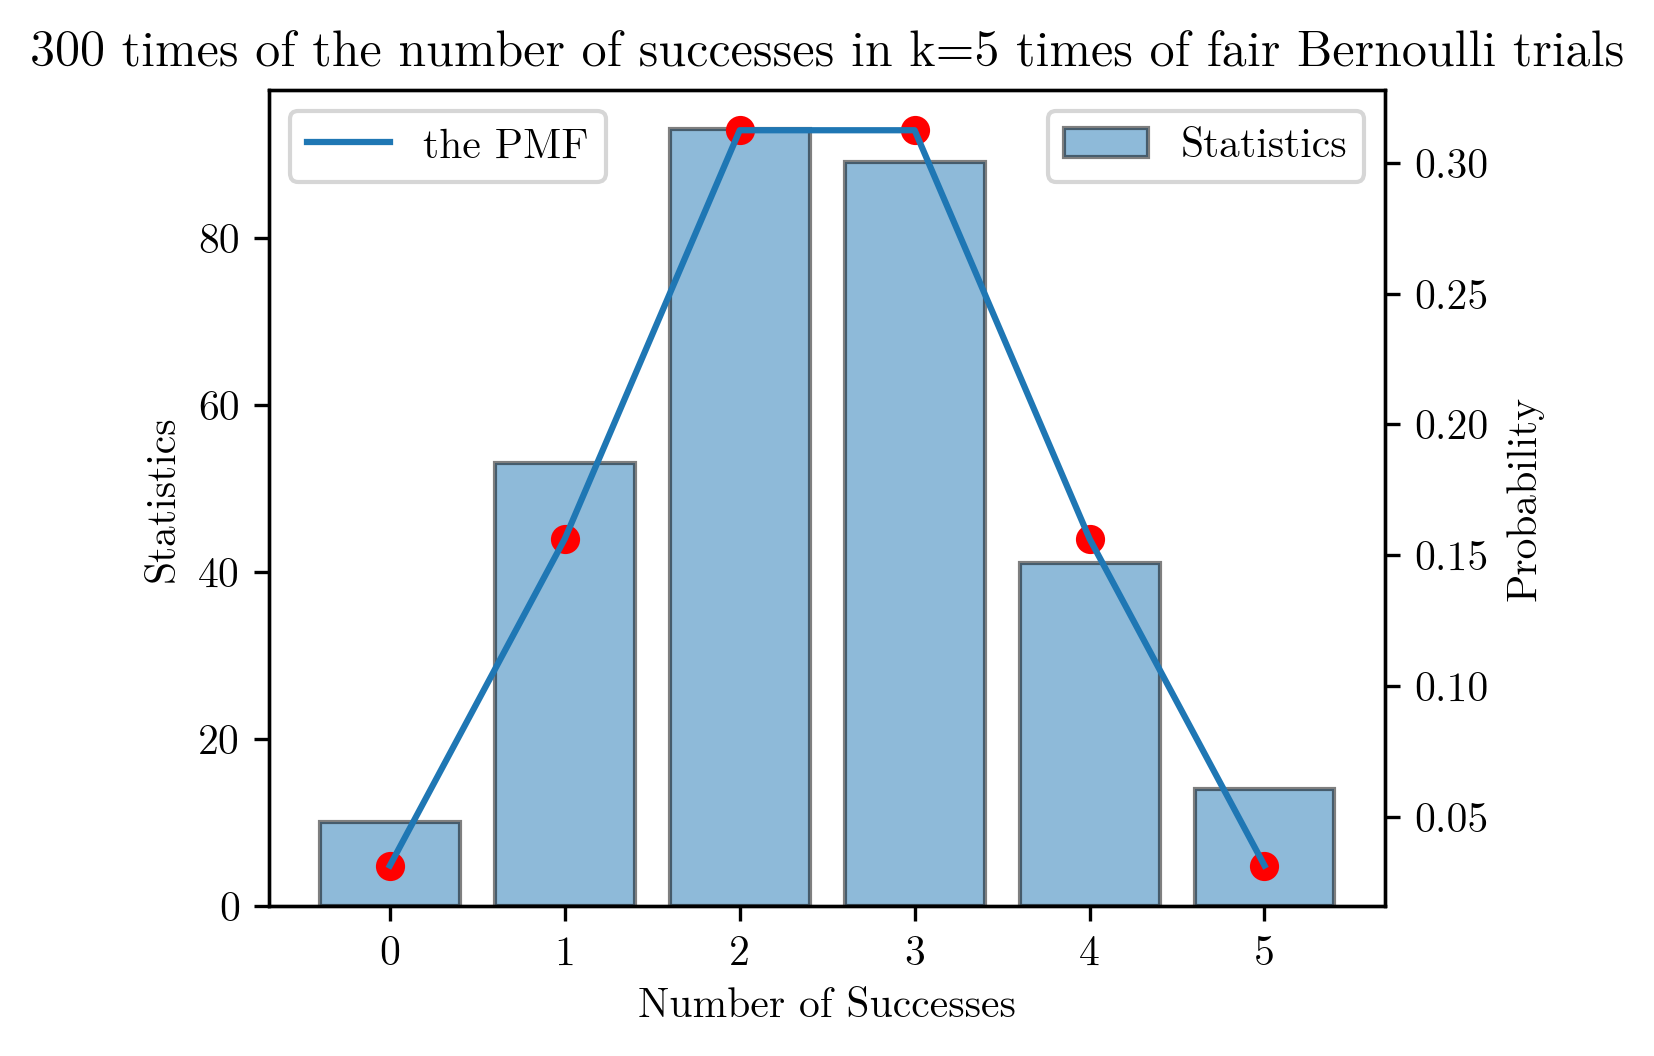

In [33]:
#300 times of the number of successes in k=5 times of fair Bernoulli trials
result = np.zeros([300,1])

for i in range(300):
    result[i] = np.sum(RejMethod(Toss,Uniform01,1,5))

p = np.zeros([6])
for k in range(6):
    p[k] = comb(5,k) * 0.5 ** 5


plt.figure(figsize = (4.8,3.6),dpi = 300)
plt.hist(result, bins = range(7), rwidth = 0.8, alpha = 0.5, \
         edgecolor = 'black', label = 'Statistics') 
plt.ylabel('Statistics')
plt.xlabel('Number of Successes')
plt.legend(loc='upper right')
plt.title('300 times of the number of successes in k=5 times \
of fair Bernoulli trials')
_ = plt.xticks(np.arange(0,6,1)+0.5,[str(i) for i in range(6)])

ax2 = plt.twinx()
ax2.plot(np.arange(0,6,1)+0.5,p,label = 'the PMF')
ax2.scatter(np.arange(0,6,1)+0.5, p, marker = 'o', color = '#FF0000')
ax2.set_ylabel('Probability')
ax2.legend(loc='upper left')

### 300 times of the number of successes in k={10,30,50} times of fair Bernoulli trials
The expectation and variance of Binomial Distribution with parameters $n,p$ are $np$, $np\left(1-p\right)$ respectively. Therefore, given $p$ to be fixed, when $n$ grows up, the expectation and variance will accordingly increase. If shown by graph, we would see that the shape shift right and get flatten as $n$ grows large. 

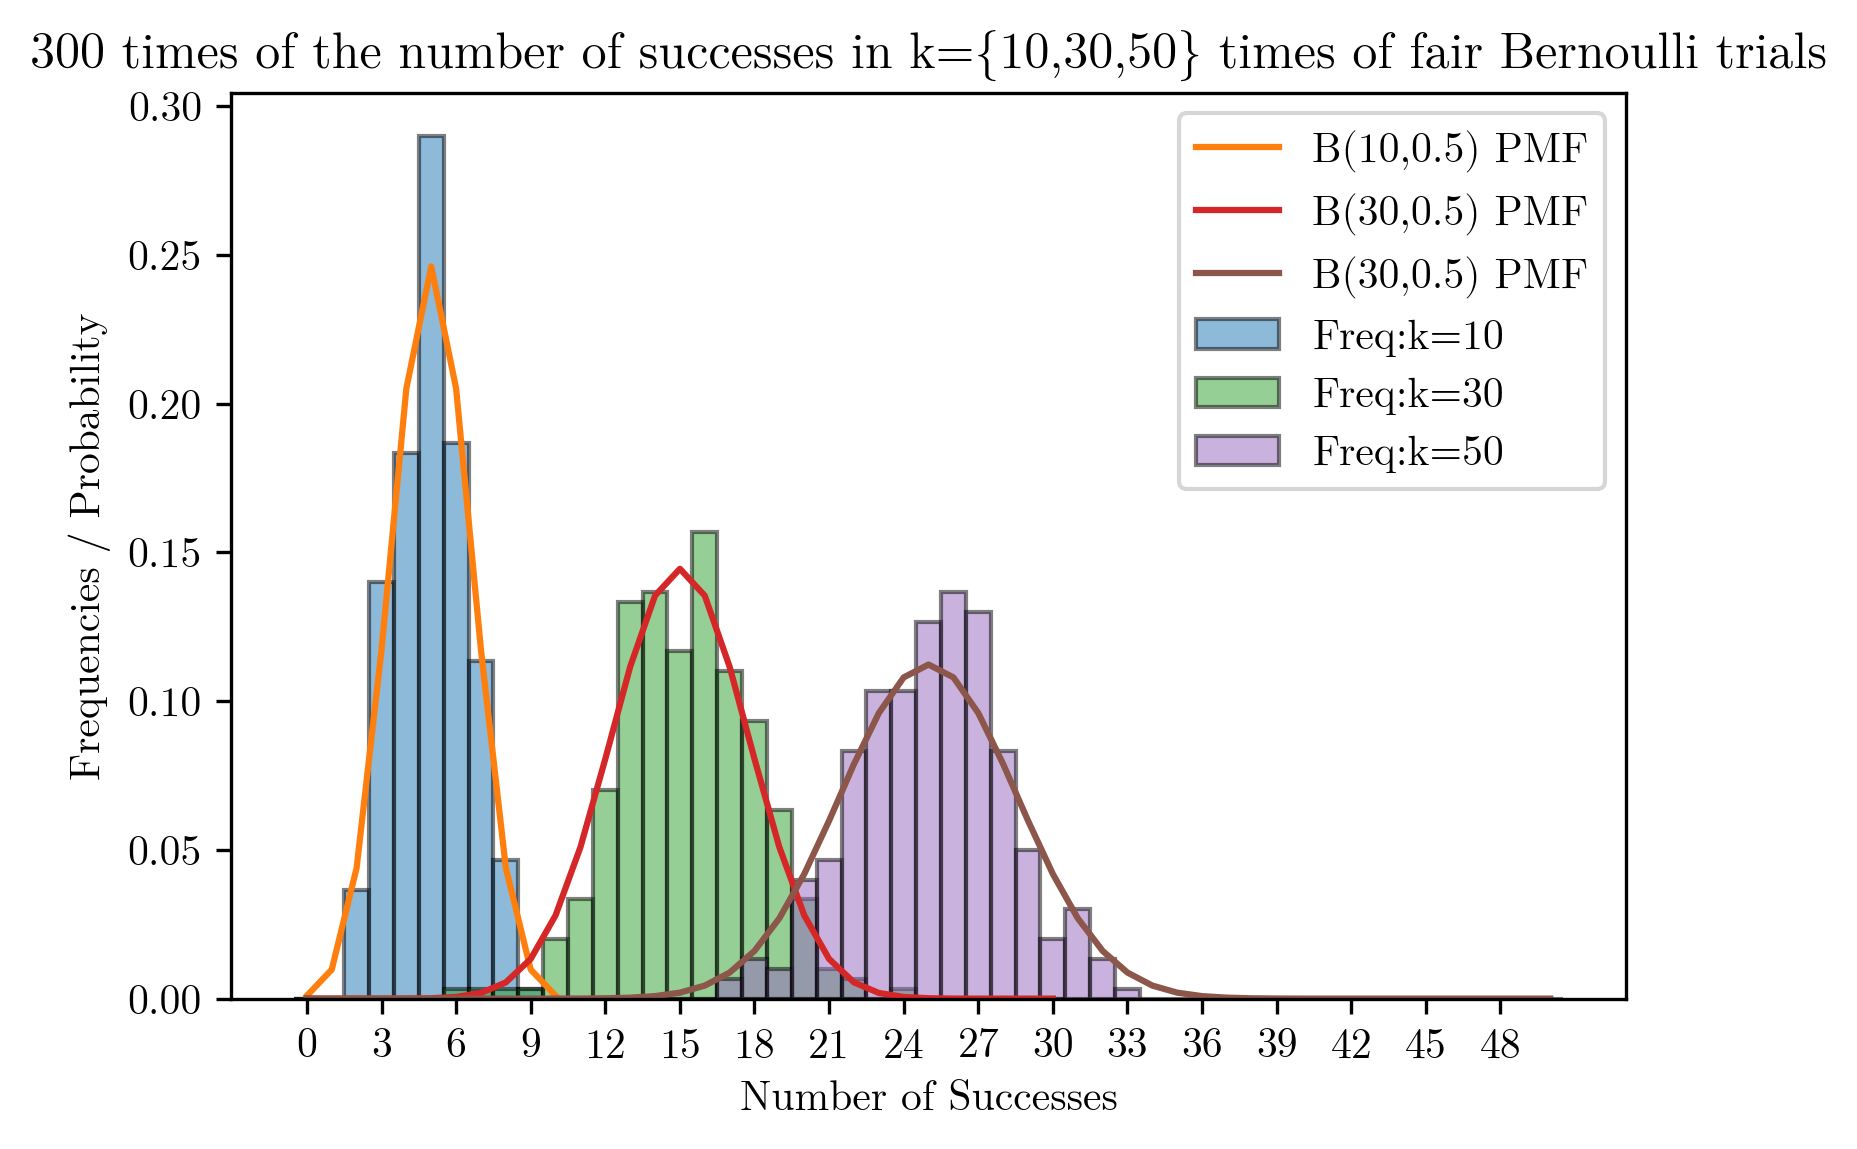

In [36]:
#300 times of the number of successes in k={10,30,50} times of fair Bernoulli trials
result1 = np.zeros([300,1])
result2 = np.zeros([300,1])
result3 = np.zeros([300,1])

for i in range(300):
    result1[i] = np.sum(RejMethod(Toss,Uniform01,1,10))
    result2[i] = np.sum(RejMethod(Toss,Uniform01,1,30))
    result3[i] = np.sum(RejMethod(Toss,Uniform01,1,50))
    
p1 = np.zeros([11])
for k in range(11):
    p1[k] = comb(10,k)
p1 = p1 * 0.5 ** 10

p2 = np.zeros([31])
for k in range(31):
    p2[k] = comb(30,k)
p2 = p2 * 0.5 ** 30

p3 = np.zeros([51])
for k in range(51):
    p3[k] = comb(50,k)
p3 = p3 * 0.5 ** 50

plt.figure(dpi = 300) 
plt.hist(result1, bins = range(12), rwidth = 1, edgecolor = 'black', \
         alpha = 0.5, label = 'Freq:k=10',density = True) 
plt.plot(np.arange(0,11,1)+0.5,p1,label = 'B(10,0.5) PMF')
plt.hist(result2, bins = range(32), rwidth = 1, edgecolor = 'black', \
         alpha = 0.5, label = 'Freq:k=30',density = True) 
plt.plot(np.arange(0,31,1)+0.5,p2,label = 'B(30,0.5) PMF')
plt.hist(result3, bins = range(52), rwidth = 1, edgecolor = 'black', \
         alpha = 0.5, label = 'Freq:k=50',density = True) 
plt.plot(np.arange(0,51,1)+0.5,p3,label = 'B(30,0.5) PMF')
plt.legend(loc='upper right')
plt.ylabel('Frequencies / Probability')
plt.xlabel('Number of Successes')
plt.title('300 times of the number of successes in k={10,30,50} times \
of fair Bernoulli trials')
_ = plt.xticks(np.arange(0,51,3)+0.5,[str(i) for i in range(0,51,3)])


## Exp.3 [Networking]
--------------------------------------------

### Q1: 

There are in total $\frac{N\left( N-1 \right)}{2}=\frac{20\left( 20-1 \right)}{2}=190$ edges in a group of $n=20$ people.

### Q3:
It is Binomial Distribution with parameters $n=190,p=0.05$.
The expectation of this PMF is $np=9.5$. Our graph shows only the part surrounding around the expectation since the remaining part is close to zero.
The following figure shows the conclusion.

In [38]:
def Connected(x):
    return 0.05

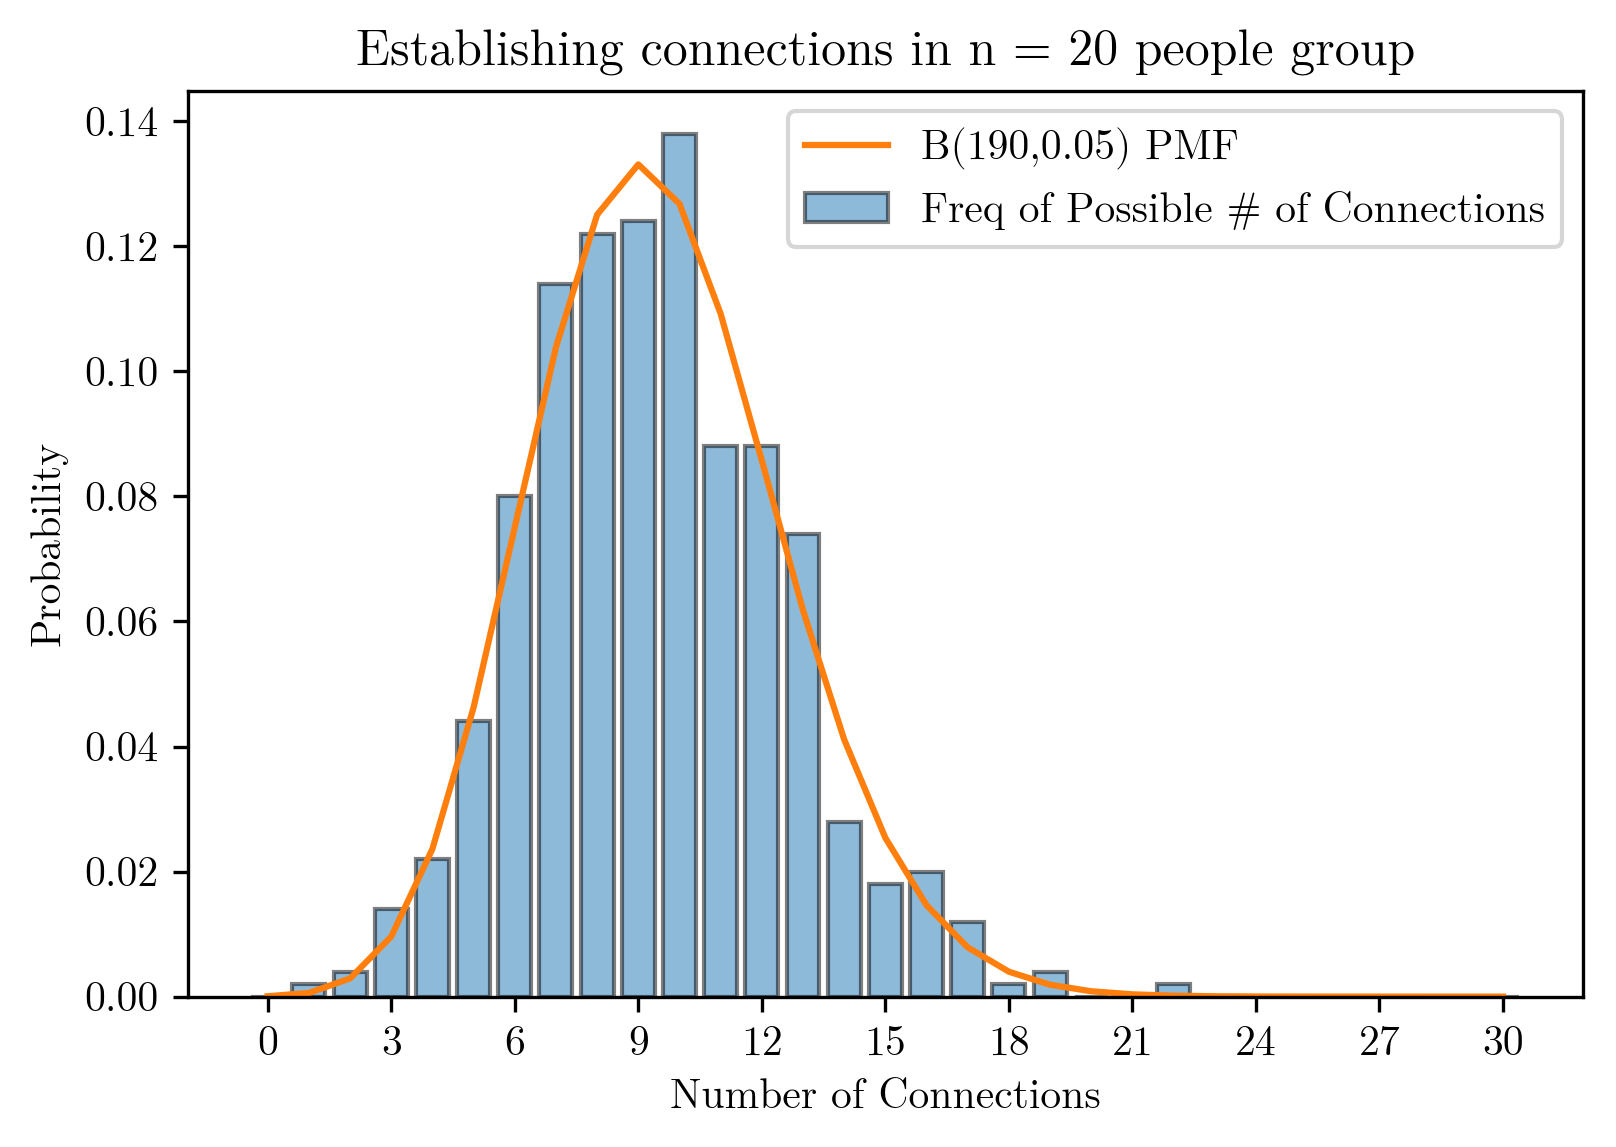

In [39]:
#Experiments of establishing connections in n = 20 people group
result = np.zeros([500,1])
p = np.zeros([31])
for k in range(30):
    p[k] = comb(190,k) * 0.05 ** k * 0.95 ** (190 - k)

for i in range(500):
    result[i] = np.sum(RejMethod(Connected,Uniform01,1,190))

plt.figure(dpi = 300) 
plt.hist(result, bins = range(32), rwidth = 0.8, edgecolor = 'black',\
         density = True, alpha = 0.5, label = 'Freq of Possible # of Connections')
plt.plot(np.arange(0,31,1)+0.5,p,label = 'B(190,0.05) PMF')
plt.ylabel('Probability')
plt.xlabel('Number of Connections')
plt.legend(loc='upper right')
plt.title('Establishing connections in n = 20 people group')
_ = plt.xticks(np.arange(0,31,3)+0.5,[str(i) for i in range(0,31,3)])